In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Create a model for predicting mortality caused by Heart Failure.

In [2]:
df = pd.read_csv('heart_failure_data.csv')

In [3]:
df.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Feature Engineering

### Checking for null values

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### No null values to handle

### Checking whether the target class is balanced or not

In [8]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

[Text(0, 0, 'Alive'), Text(0, 0, 'Dead')]

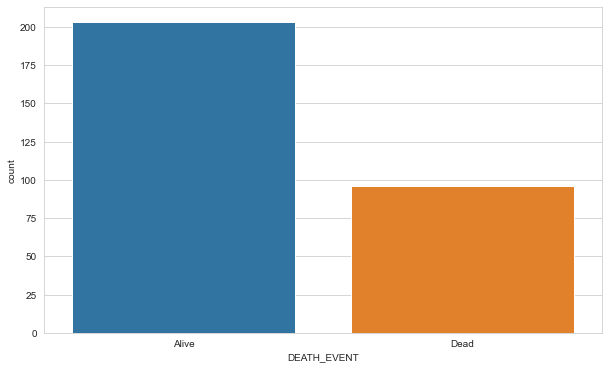

In [9]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="DEATH_EVENT",data=df)
plot.set_xticklabels(["Alive","Dead"])

#### Seems to be fine

## Performing EDA using Panda Profiling

In [23]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Heart Failure Prediction')
prof_report.to_widgets()

## Feature Engineering

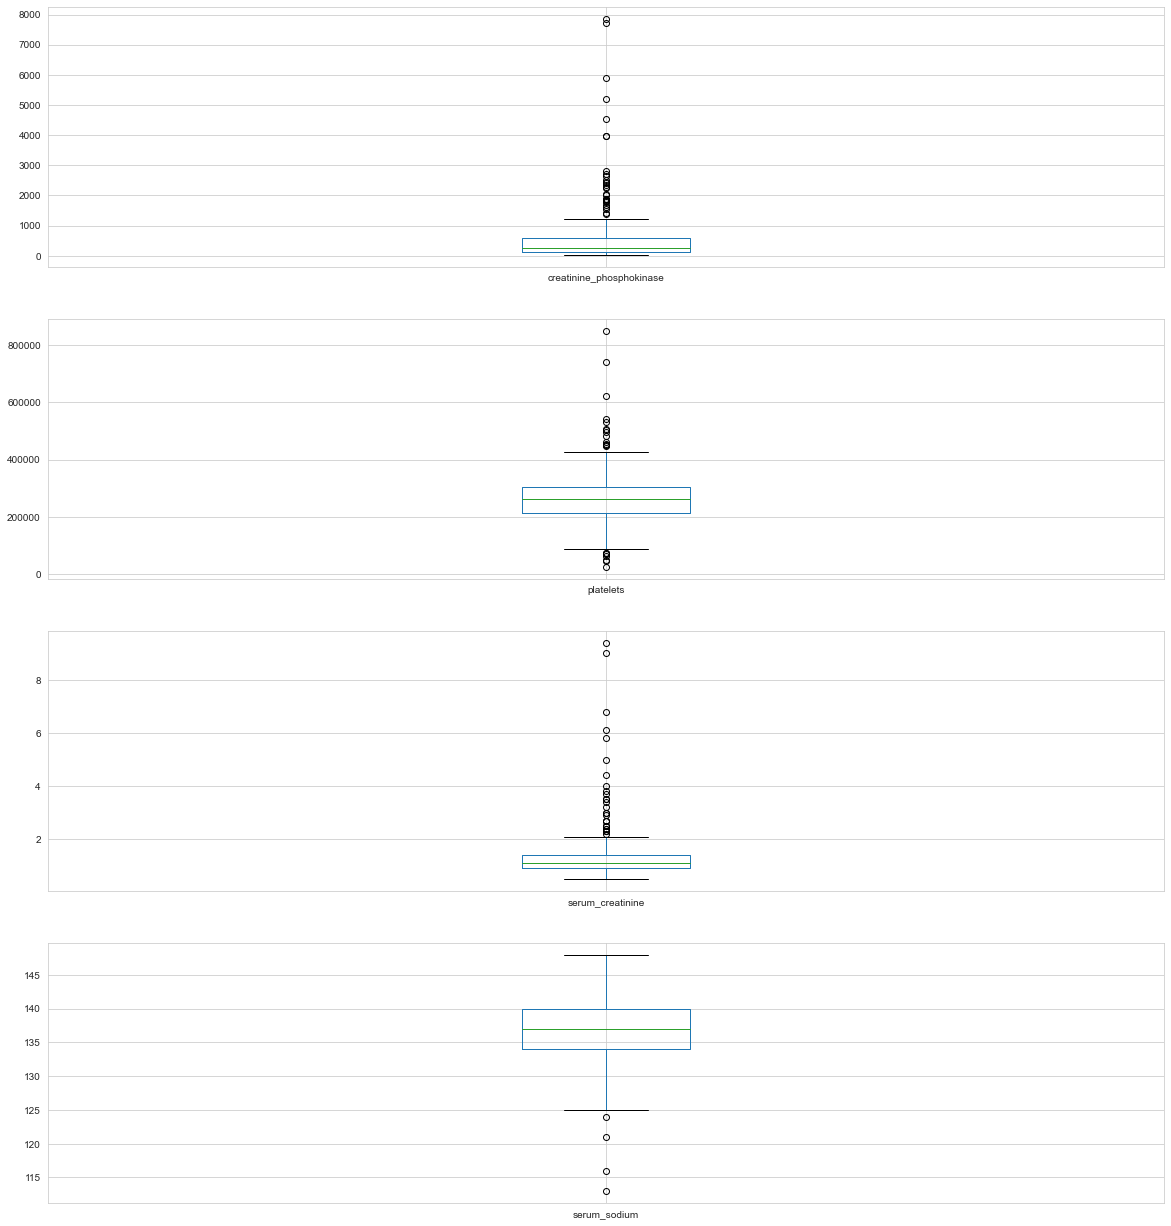

In [10]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='creatinine_phosphokinase')
df.boxplot(ax=axes[1],column='platelets')
df.boxplot(ax=axes[2],column='serum_creatinine')
df.boxplot(ax=axes[3],column='serum_sodium')

In [11]:
IQR=df['creatinine_phosphokinase'].quantile(0.75)-df['creatinine_phosphokinase'].quantile(0.25)
upper_bridge=df['creatinine_phosphokinase'].quantile(0.75)+(IQR*1.5)
indices=df[df['creatinine_phosphokinase']>upper_bridge].index
for i in indices.tolist():
    df['creatinine_phosphokinase'][i]=upper_bridge

In [12]:
IQR=df['platelets'].quantile(0.75)-df['platelets'].quantile(0.25)
lower_bridge=df['platelets'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['platelets'].quantile(0.75)+(IQR*1.5)
#print(lower_bridge), print(upper_bridge)
indices=df[df['platelets']>upper_bridge].index
for i in indices.tolist():
    df['platelets'][i]=upper_bridge
indices=df[df['platelets']<lower_bridge].index
for i in indices.tolist():
    df['platelets'][i]=lower_bridge

In [13]:
IQR=df.serum_creatinine.quantile(0.75)-df.serum_creatinine.quantile(0.25)
upper_bridge=df['serum_creatinine'].quantile(0.75)+(IQR*1.5)
indices=df[df['serum_creatinine']>upper_bridge].index
for i in indices.tolist():
    df['serum_creatinine'][i]=upper_bridge

In [14]:
IQR=df.serum_sodium.quantile(0.75)-df.serum_sodium.quantile(0.25)
lower_bridge=df['serum_sodium'].quantile(0.25)-(IQR*1.5)
indices=df[df['serum_sodium']<lower_bridge].index
for i in indices.tolist():
    df['serum_sodium'][i]=lower_bridge

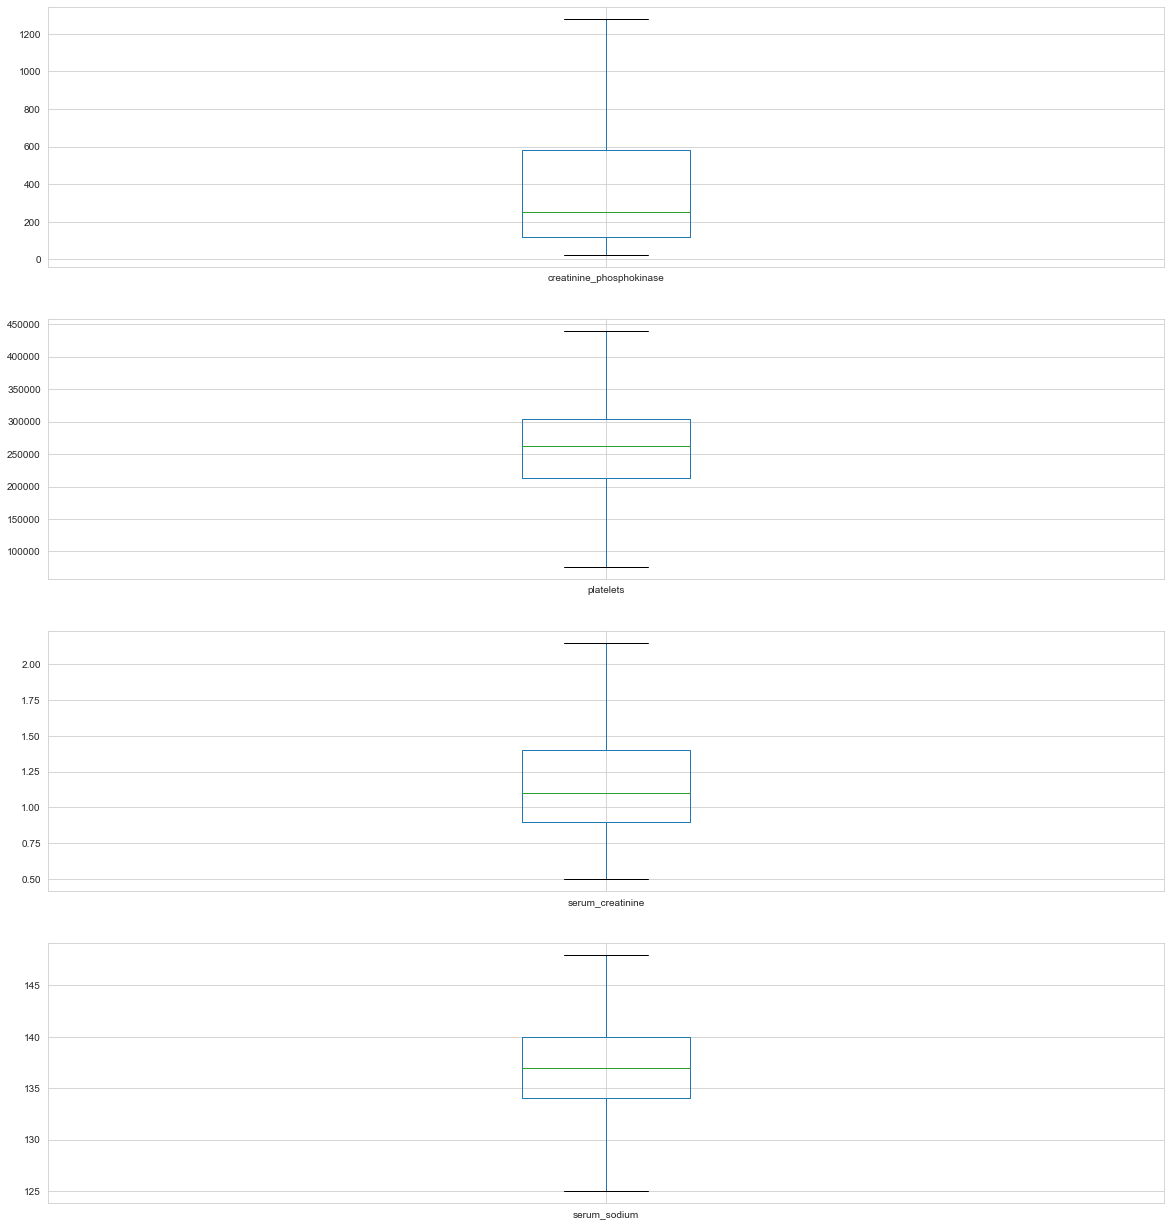

In [15]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='creatinine_phosphokinase')
df.boxplot(ax=axes[1],column='platelets')
df.boxplot(ax=axes[2],column='serum_creatinine')
df.boxplot(ax=axes[3],column='serum_sodium')

#### Using Heatmap

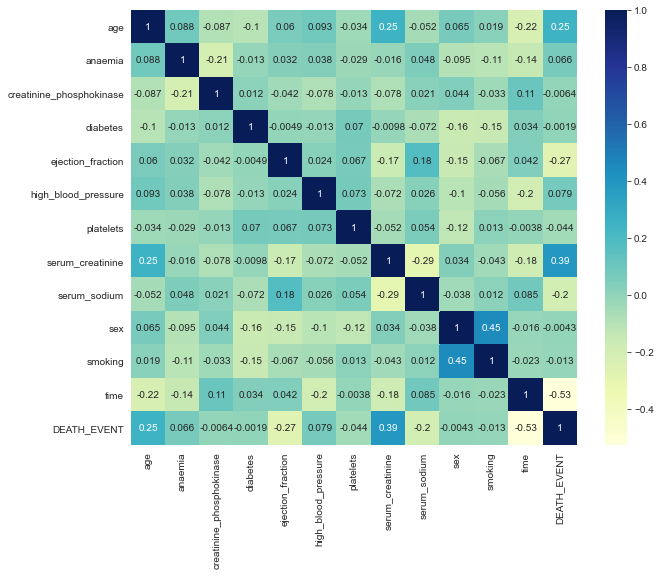

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [22]:
x=df[['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']]
y=df["DEATH_EVENT"]

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

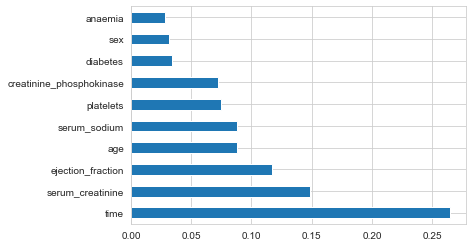

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Feature Selection

In [25]:
x=df[['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'smoking','time']]
y=df["DEATH_EVENT"]


### XG Boost

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [32]:
classifier=xgboost.XGBClassifier()

In [33]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.01,0.001,0.0001,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [34]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [36]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [37]:
classifier=xgboost.XGBClassifier(max_depth=None,subsample=None,n_estimators=100,learning_rate=None,min_child_weight=None, random_state=0,reg_alpha=0, reg_lambda=1)

In [38]:
classifier.fit(X_train, y_train)

[19:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[47  8]
 [ 2 18]]
0.8666666666666667


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        55
           1       0.69      0.90      0.78        20

    accuracy                           0.87        75
   macro avg       0.83      0.88      0.84        75
weighted avg       0.89      0.87      0.87        75



In [49]:
X_test.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'smoking', 'time'],
      dtype='object')

In [50]:
import pickle
pickle.dump(classifier, open('heartFailureAcc87r90.pkl','wb'))

In [53]:
X_test.shape

(75, 9)

In [54]:
X_test.iloc[70:74]

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
159,59.0,129,45,1,362000.00,1.1,139,1,121
268,45.0,582,38,0,302000.00,0.9,140,0,244
170,51.0,582,35,0,263358.03,1.5,136,1,145
18,70.0,125,25,1,237000.00,1.0,140,0,15


In [55]:
y_test.iloc[70:74]

159    0
268    0
170    0
18     1
Name: DEATH_EVENT, dtype: int64

In [56]:
classifier.predict(X_test.iloc[70:71])

array([0], dtype=int64)

In [58]:
print(type(X_test.iloc[70:71]))

<class 'pandas.core.frame.DataFrame'>
